Found 19986 images belonging to 26 classes.
Found 7512 images belonging to 26 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2841s 9s/step - accuracy: 0.4793 - loss: 1.9336 - val_accuracy: 0.7724 - val_loss: 0.7594
Epoch 2/40
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23:39 5s/step - accuracy: 0.6719 - loss: 1.1968

C:\Users\arshi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


312/312 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6719 - loss: 1.1968 - val_accuracy: 0.7083 - val_loss: 0.8688
Epoch 3/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2975s 10s/step - accuracy: 0.6865 - loss: 1.0339 - val_accuracy: 0.8121 - val_loss: 0.6076
Epoch 4/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8438 - loss: 0.6090 - val_accuracy: 0.7917 - val_loss: 0.6983
Epoch 5/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2586s 8s/step - accuracy: 0.7082 - loss: 0.9480 - val_accuracy: 0.8263 - val_loss: 0.5610
Epoch 6/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6562 - loss: 0.9274 - val_accuracy: 0.7500 - val_loss: 0.8182
Epoch 7/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2615s 8s/step - accuracy: 0.7305 - loss: 0.8599 - val_accuracy: 0.8427 - val_loss: 0.5055
Epoch 8/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7344 - loss: 0.8551 - val_accuracy: 0.8750 - val_loss: 0.5251
Epoch 9/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2623s 8s/step - accuracy: 0.7372 - loss: 0.8449 - val_accuracy: 0.84

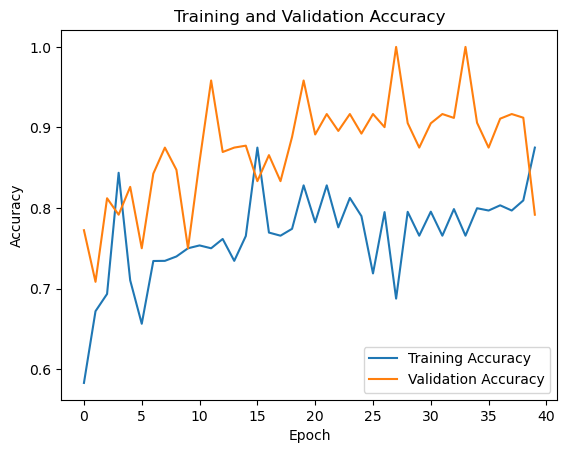

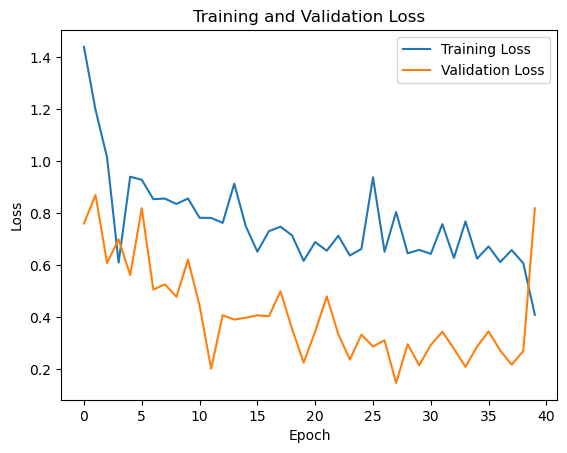

In [34]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

# Define directory paths for training and validation data
train_dir = "train"
val_dir = "valid"

# Data preprocessing and augmentation for training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
)

# Number of classes for the output layer
num_classes = len(train_generator.class_indices)

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained features
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
)

# Save the model for future use
model.save("inception_v3_model.h5")

# Optionally, plot the training history
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [36]:
from tensorflow.keras.utils import load_img, img_to_array
image = load_img('Crushed bottles_crushed_bottle (27).jpeg', target_size=(224, 224))  # Resize to match model input
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize pixel values (if needed)

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load the saved model
model = load_model('inception_v3_model.h5')

# Path to the test image
image_path = 'Crushed bottles_crushed_bottle (27).jpeg'

# Load and preprocess the image
image = load_img(image_path, target_size=(224, 224))  # Adjust size as per model input
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)  # Get the index of the highest probability class

# Display the prediction
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted class: 0


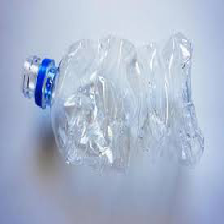

In [40]:
image

In [42]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Directory paths
val_dir = "valid"

# Load the saved model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Validation data preprocessing
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False  # Ensures data order for confusion matrix computation
)

# Generate predictions on the validation dataset
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Classification report
target_names = list(val_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes, target_names=target_names))


Found 7512 images belonging to 26 classes.
118/118 ━━━━━━━━━━━━━━━━━━━━ 549s 5s/step
Confusion Matrix:
 [[ 58   0   0   0   0   0   0   0   0   0   0   0   3   0   0   2   0   0
    1   0   0   0   1   0   0   7]
 [  0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  0   0  51   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0  52   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   5   0   0   0]
 [  0   0   0   0 617   0   0   0   0  10   8   5   1   3   0   0   4   1
    0   9   0   1   4  14   3   1]
 [  0   0   0   0   2  43   0   0   0   0   0   0   4   0   0   0   3   0
    1   1   0   0   1   0   0   0]
 [  0   0   1   0   0   0 105   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0  66   1   0   0   1   0   0   0   0   2   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   

### The overall F1-scores are generally high, indicating the model has a good balance between identifying true positives while minimizing false positives and false negatives.

### The model performed well for most classes, with high precision and recall for many waste types such as "Dirty paper plates" (precision = 1.00, recall = 0.96).

### The lowest precision was for "pesticidebottle" (0.88), meaning there were more false positives for this category compared to others.

### The overall F1-scores are generally high, indicating the model has a good balance between identifying true positives while minimizing false positives and false negatives.

# Precision

### Precision is the ratio of correctly predicted positive observations to the total predicted positives. It tells us how many of the predicted items in a class were actually correct.

# Recall
### Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It tells us how well the model finds all relevant items.

# F1-Score:
### The F1-score is the weighted average of precision and recall. It considers both false positives and false negatives, and is especially useful when there is an uneven class distribution.

# Support:
### Support is the number of actual occurrences of each class in the dataset. It indicates how many examples of that category are present.

Found 7512 images belonging to 26 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step


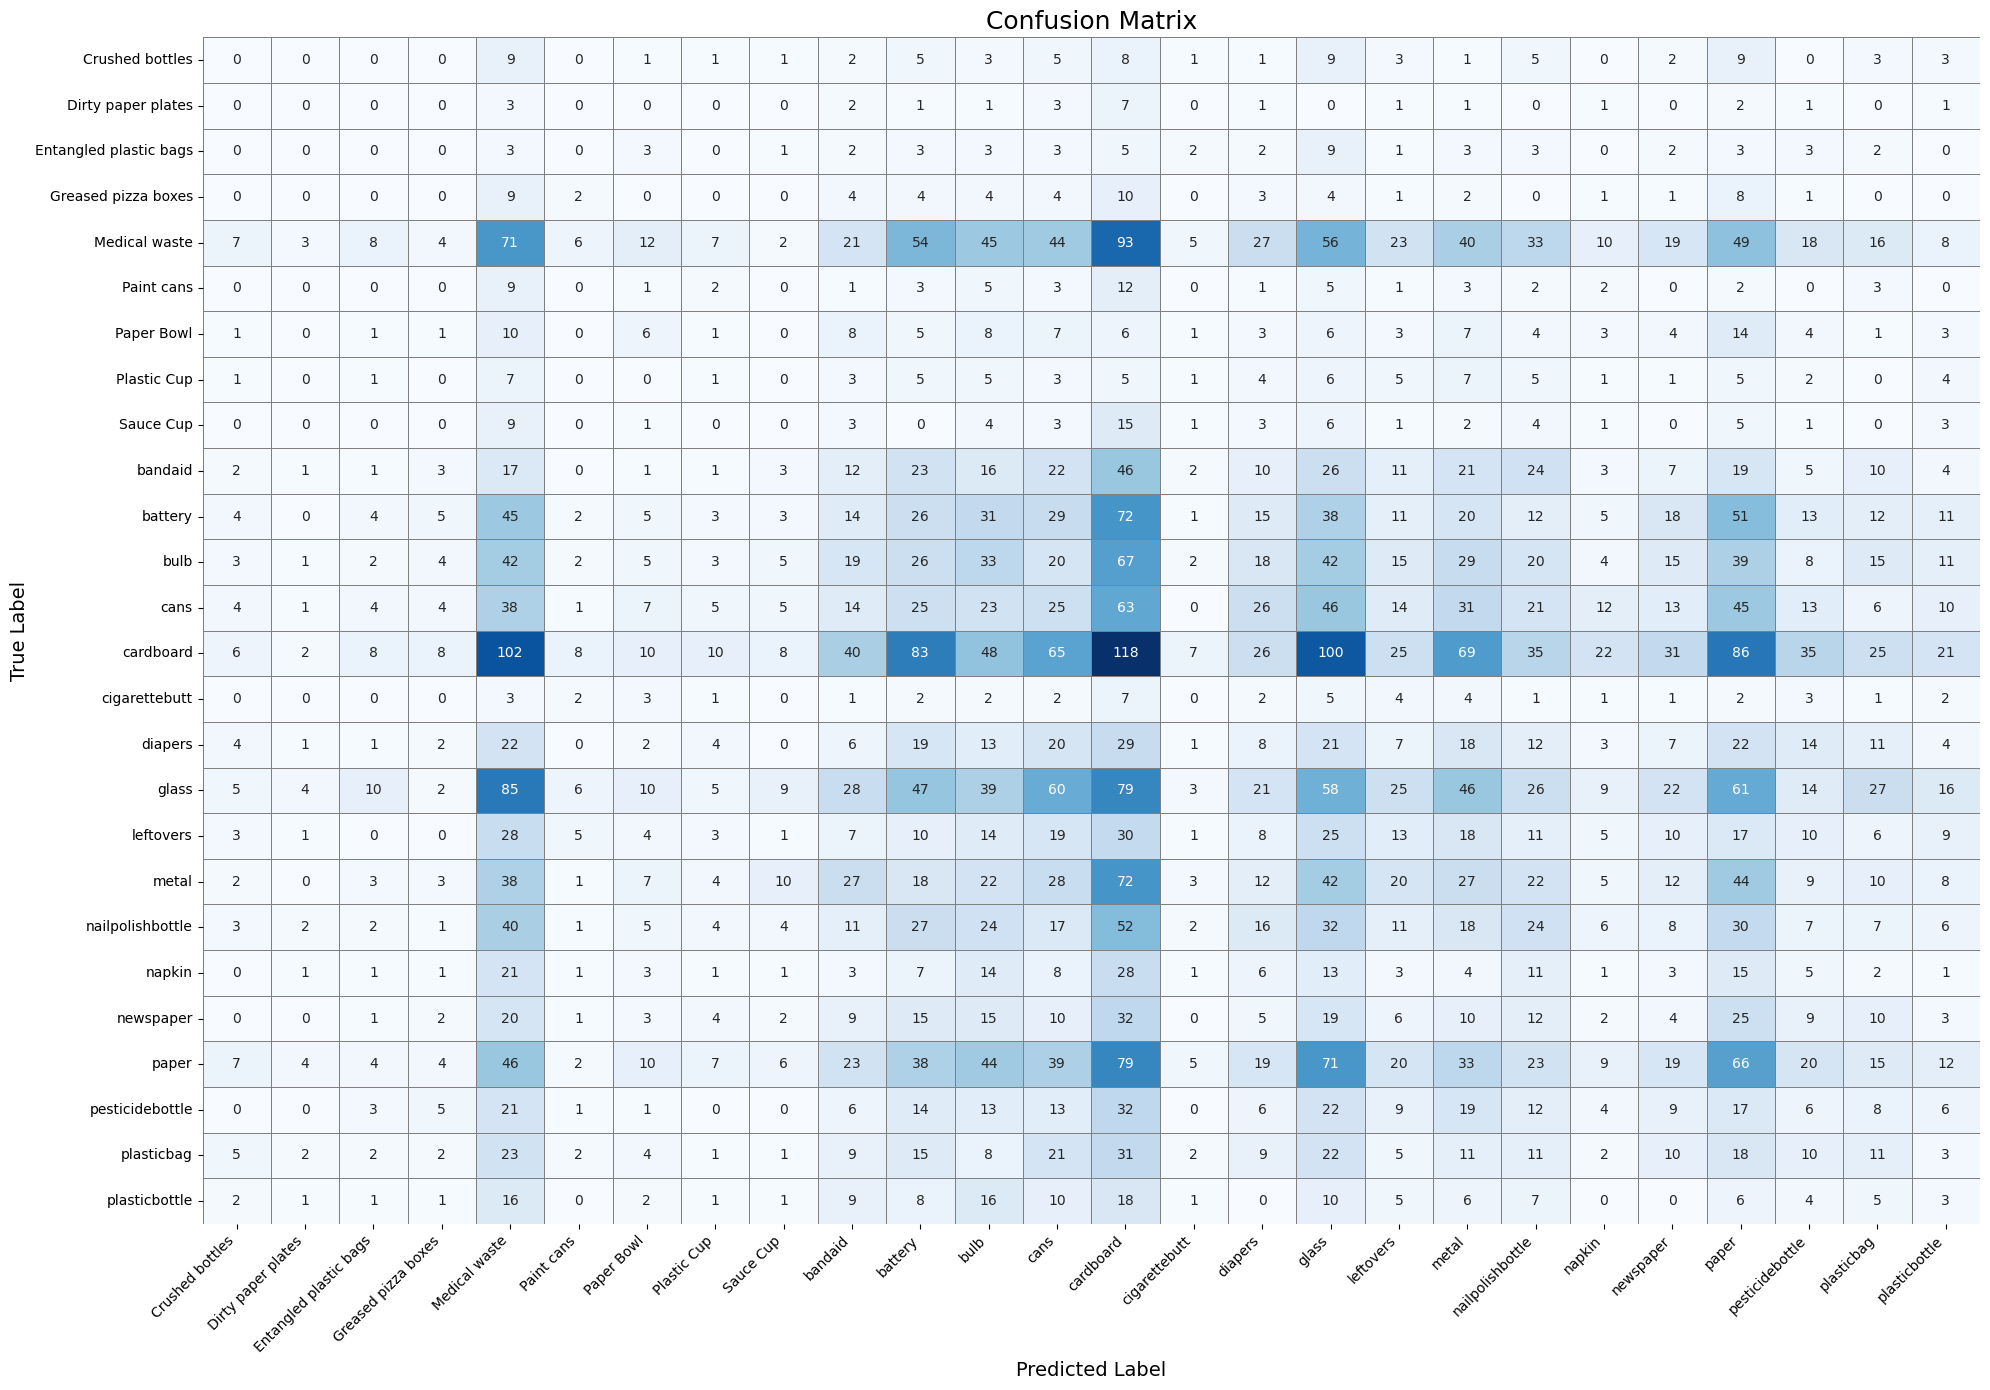

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Directory for validation data
val_dir = "valid"

# Prepare the validation data generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Get predictions and true labels
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
labels = list(val_generator.class_indices.keys())  # Get class labels

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(20, 14))  # Increase figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False, linewidths=0.5, linecolor='grey')

# Formatting and labels
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent cut-off text
plt.tight_layout()

# Show the plot
plt.show()


Found 7512 images belonging to 26 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 559s 2s/step


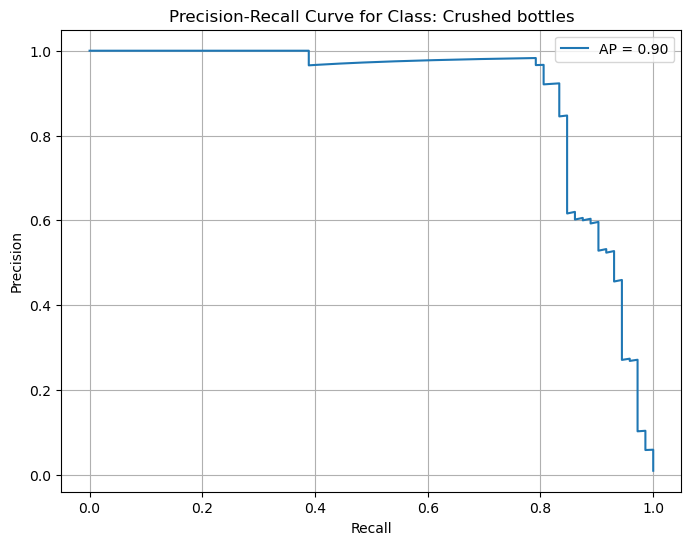

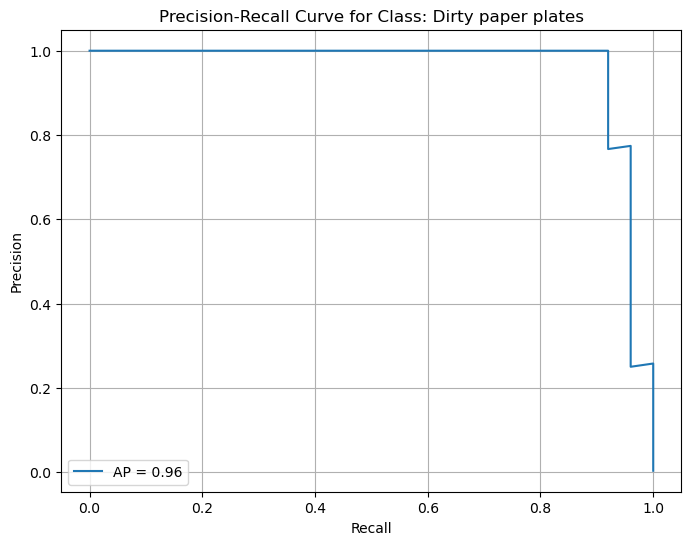

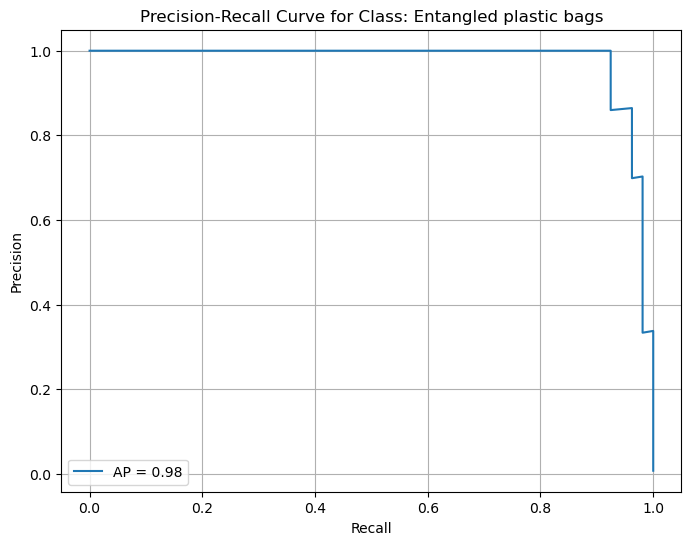

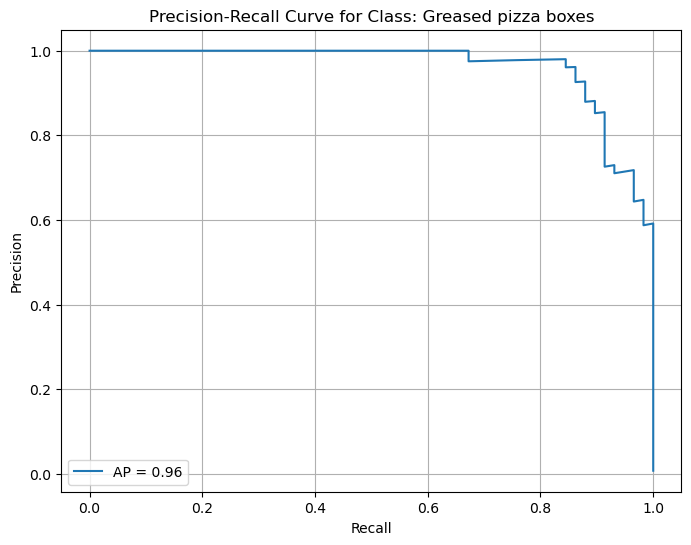

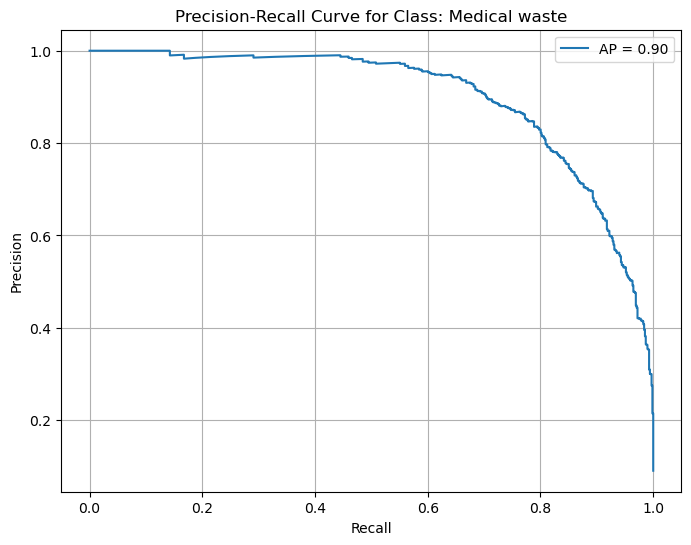

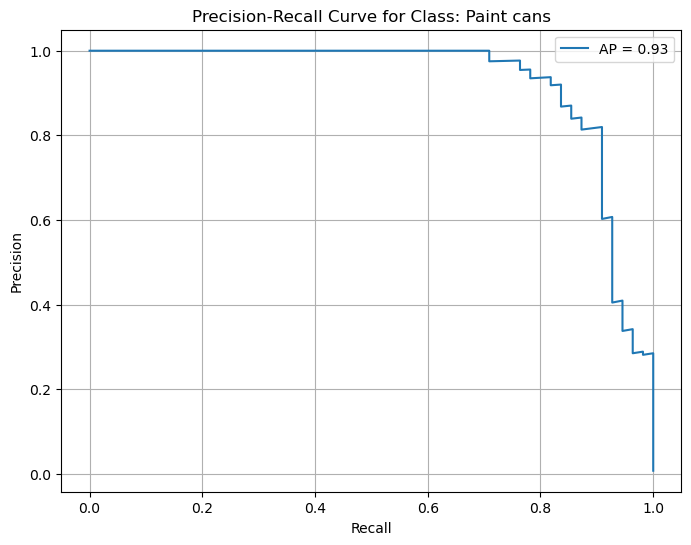

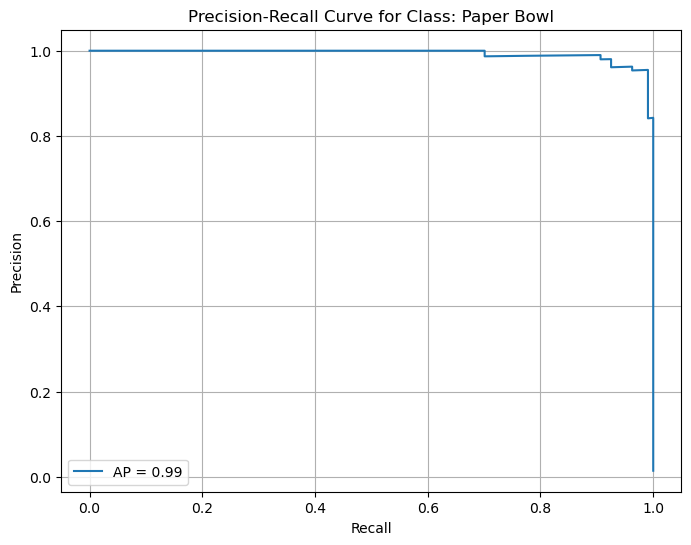

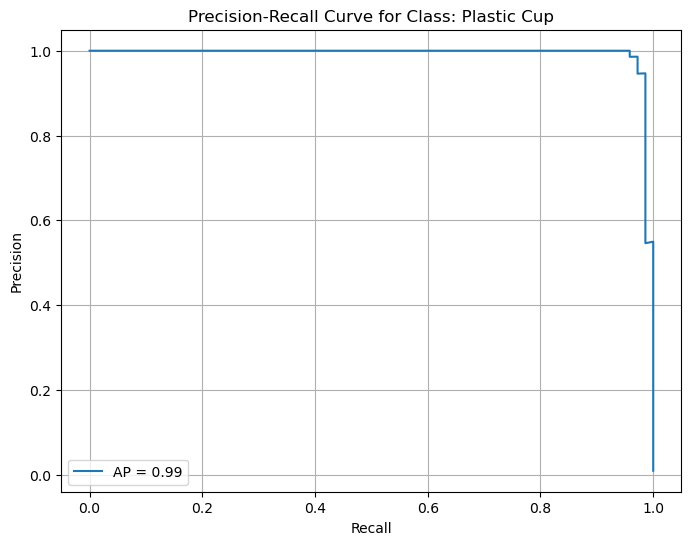

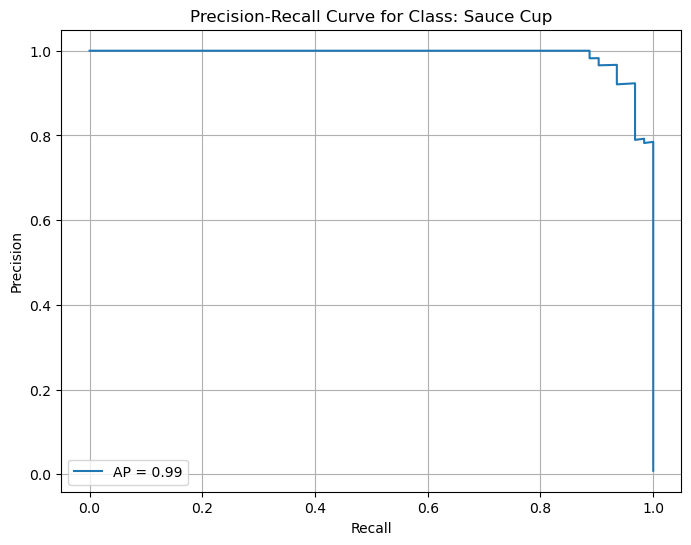

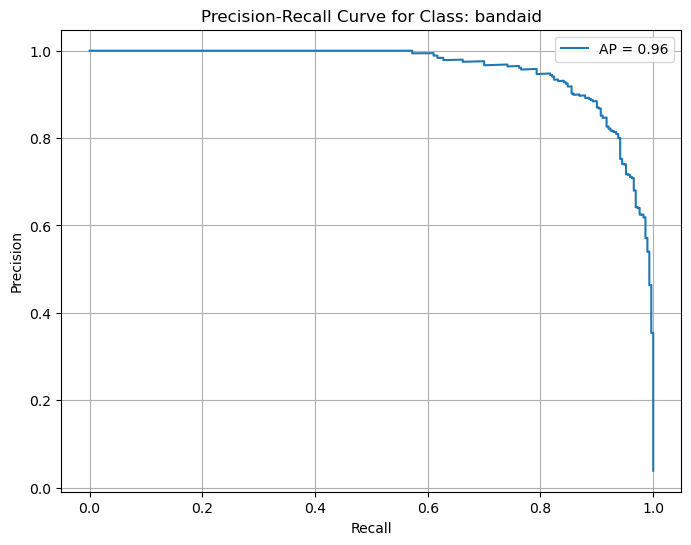

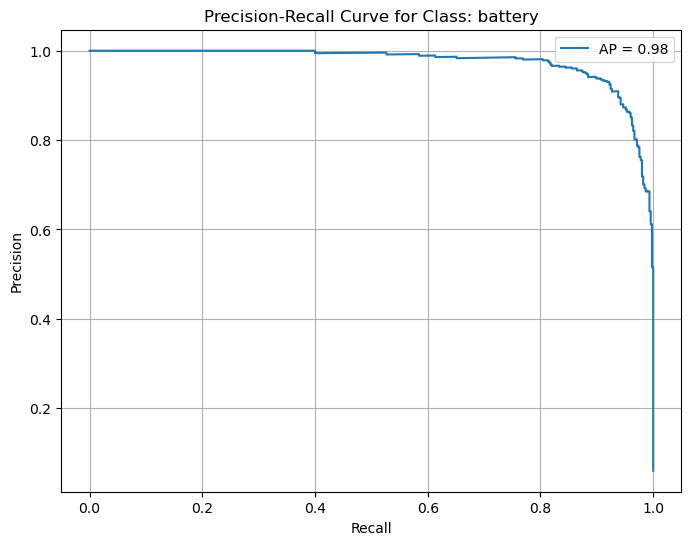

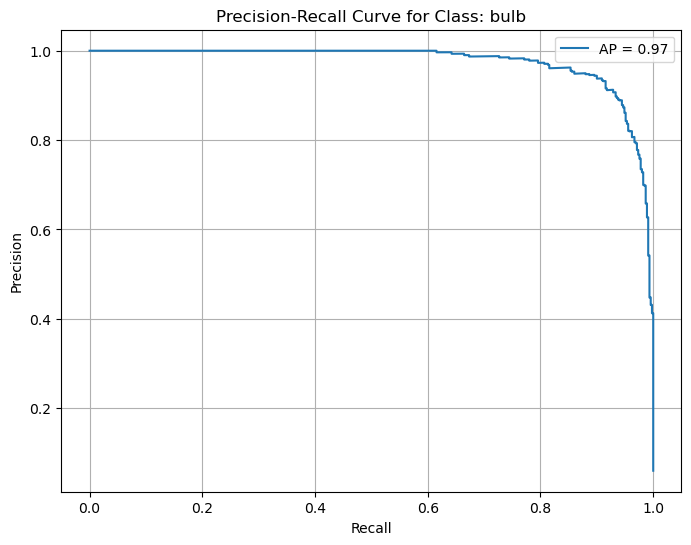

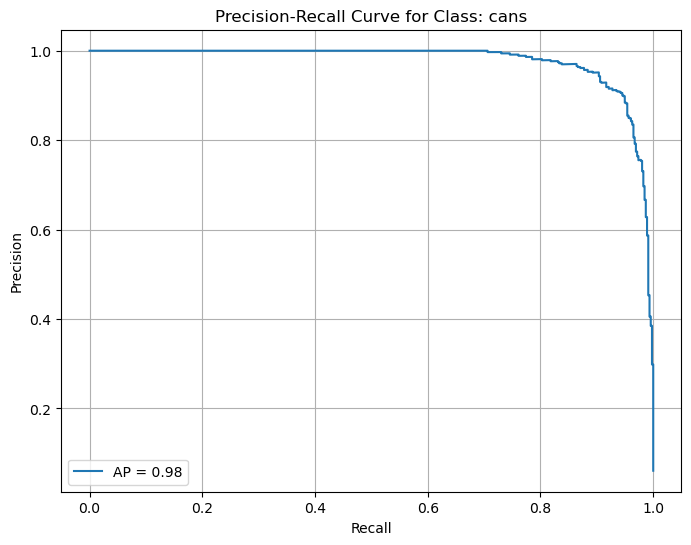

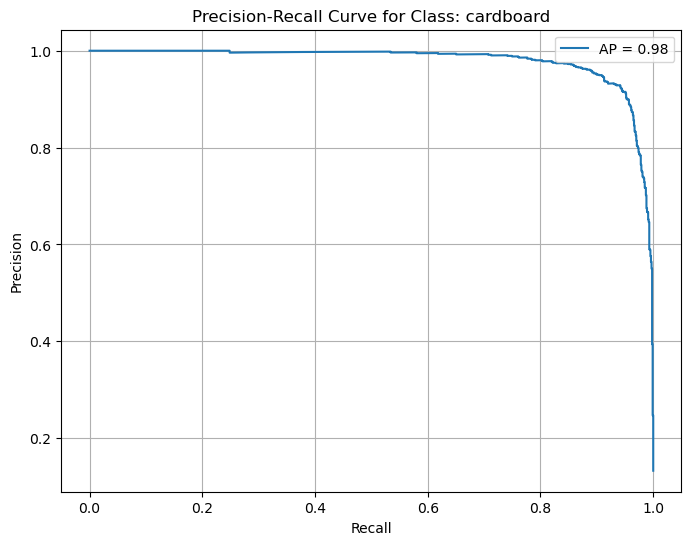

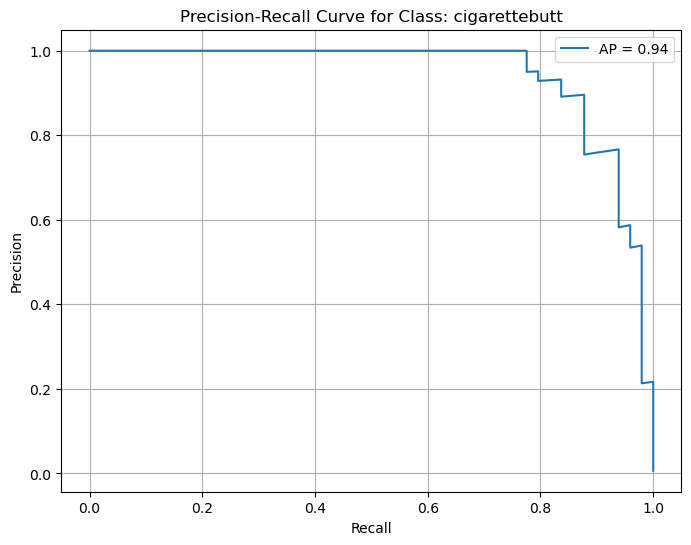

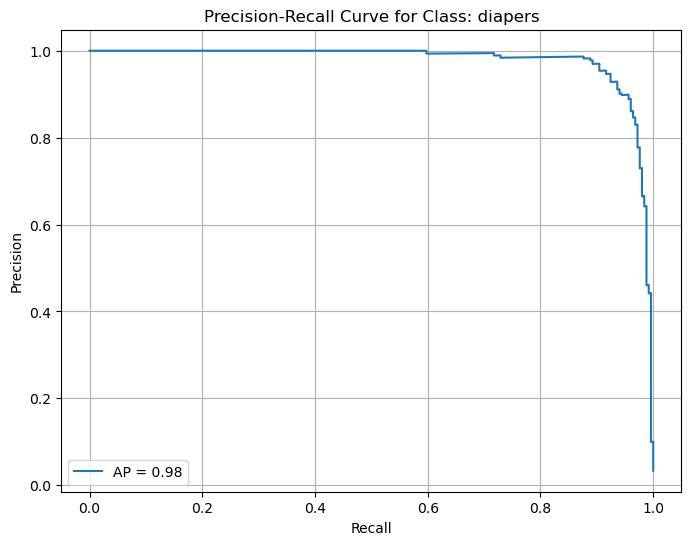

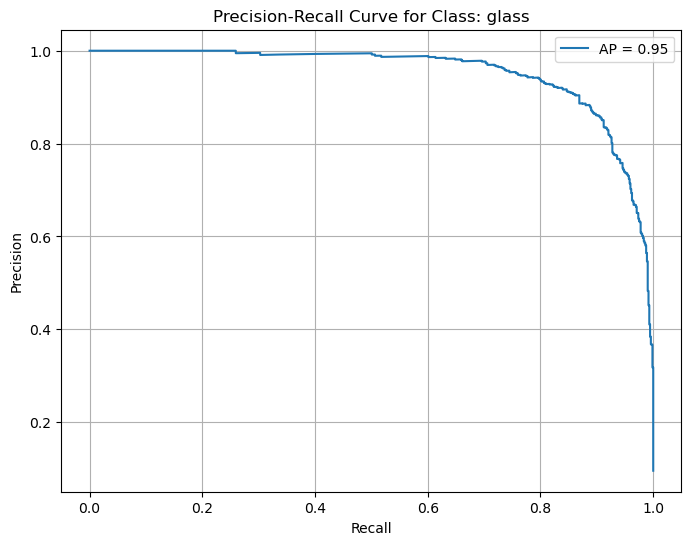

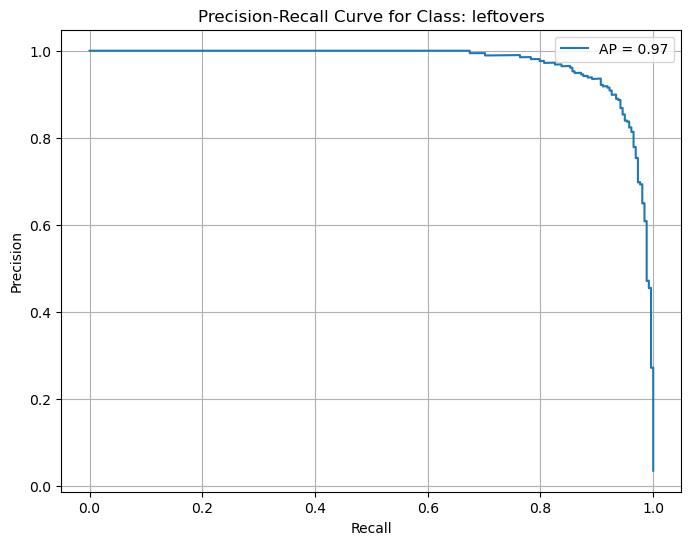

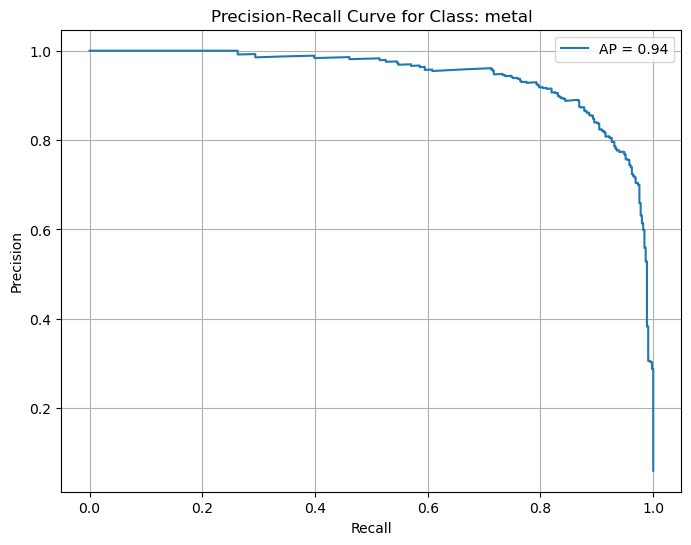

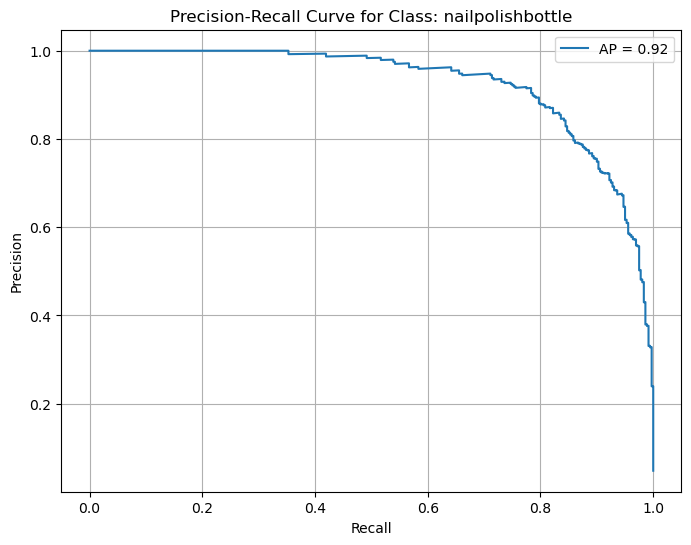

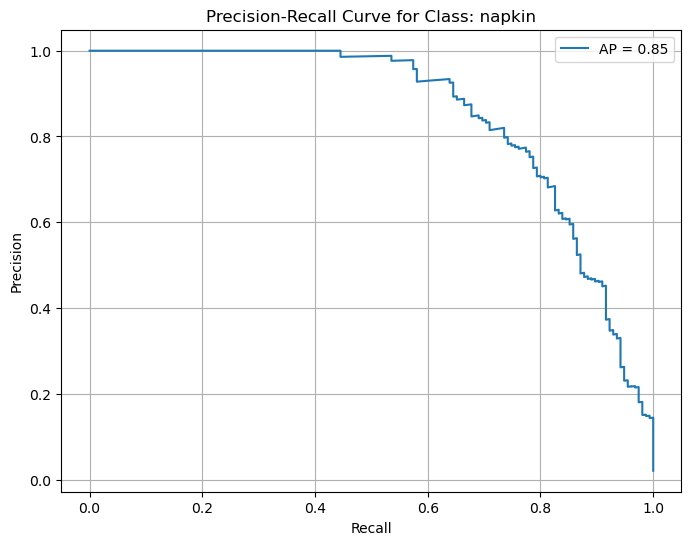

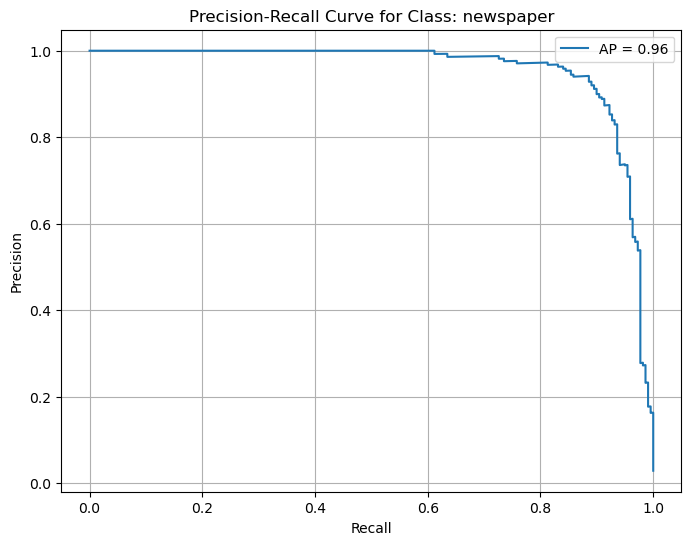

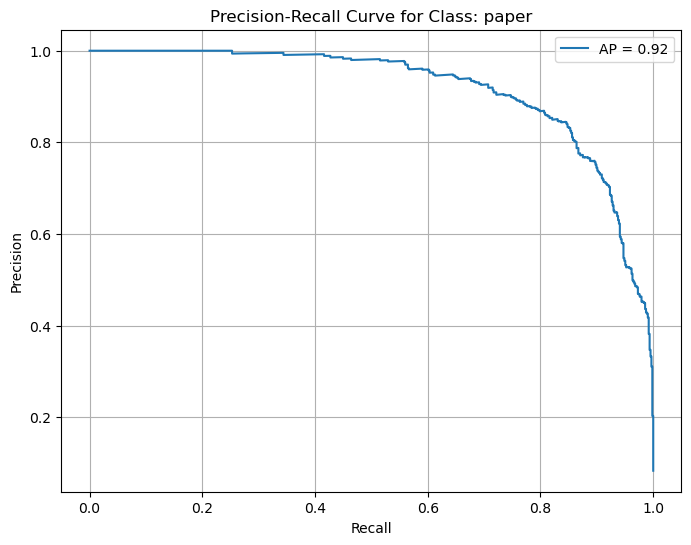

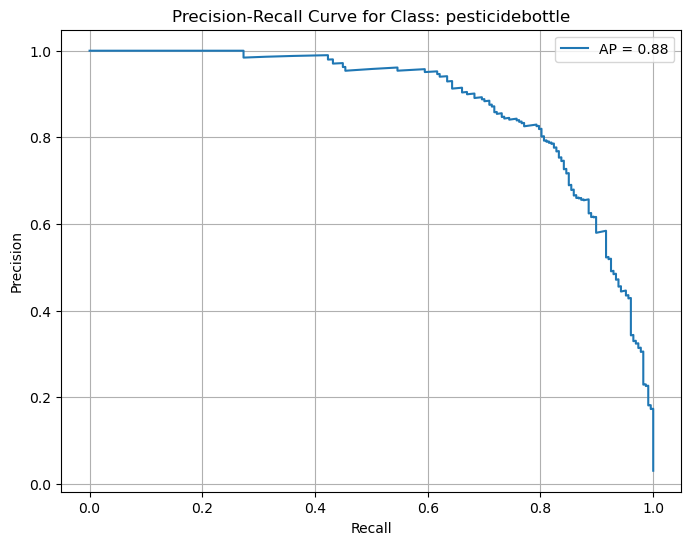

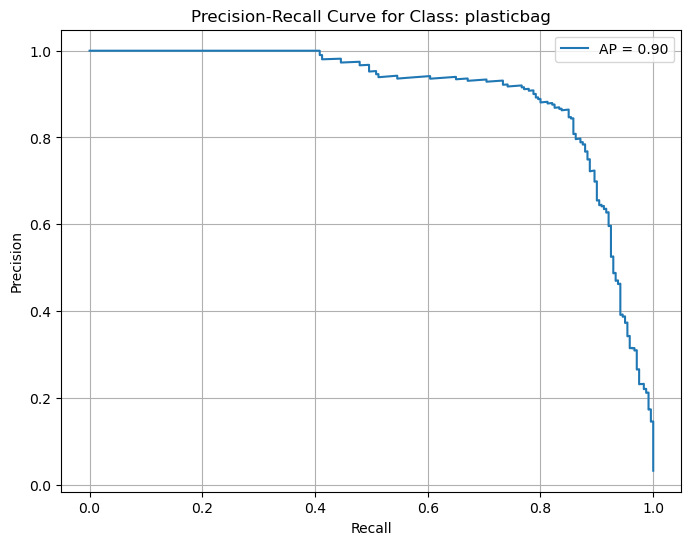

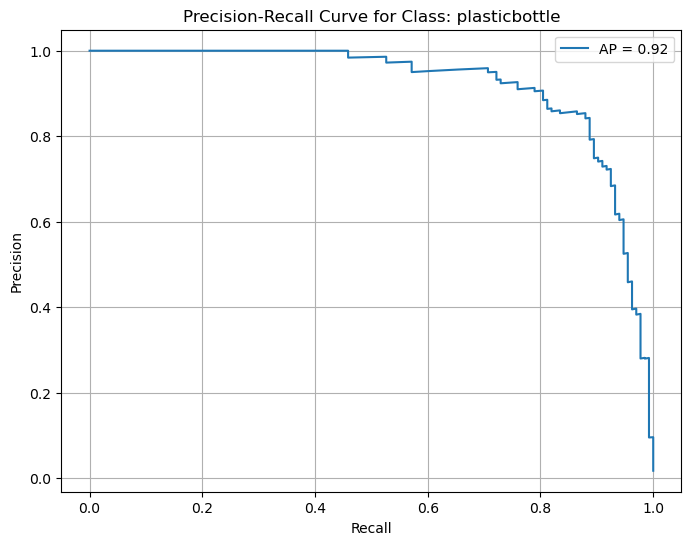

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import label_binarize

# Load the trained model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Directory for validation data
val_dir = "valid"

# Prepare the validation data generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",  # Use categorical for multi-class classification
    shuffle=False
)

# Get predictions and true labels
val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)

# Binarize true labels for multi-class precision-recall curve computation
true_classes = val_generator.classes
num_classes = len(val_generator.class_indices)  # Number of classes
true_classes_binarized = label_binarize(true_classes, classes=list(range(num_classes)))

# Generate Precision-Recall curves for each class
for i, class_name in enumerate(val_generator.class_indices.keys()):
    precision, recall, _ = precision_recall_curve(true_classes_binarized[:, i], predictions[:, i])
    average_precision = average_precision_score(true_classes_binarized[:, i], predictions[:, i])

    # Plot each class's Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for Class: {class_name}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Define the labels (must match the labels used during training)
labels = list(val_generator.class_indices.keys())  # Assuming val_generator is defined as in the previous code

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch (1, height, width, channels)
    img_array /= 255.0  # Normalize the image
    return img_array

# Predict the label of an image
def predict_image_label(img_path):
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)  # Get model predictions
    predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    predicted_label = labels[predicted_class[0]]  # Map index to class label

    # Display the image along with the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Test the function
img_path = "Images/Crushed bottles_crushed_bottle (41).jpeg.jpg"  
predict_image_label(img_path)
predict_image_label(img_path1)
predict_image_label(img_path2)
predict_image_label(img_path3)
predict_image_label(img_path4)
predict_image_label(img_path5)
predict_image_label(img_path6)
predict_image_label(img_path7)
predict_image_label(img_path8)
predict_image_label(img_path9)
predict_image_label(img_path10)


KeyboardInterrupt



1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


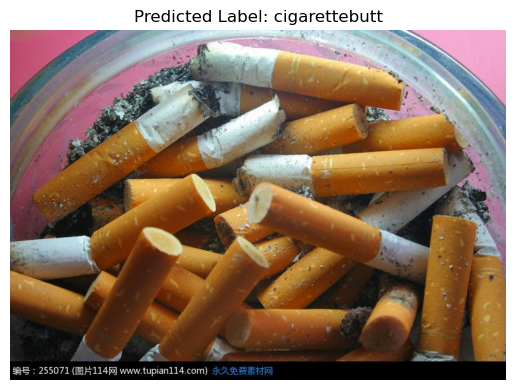

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


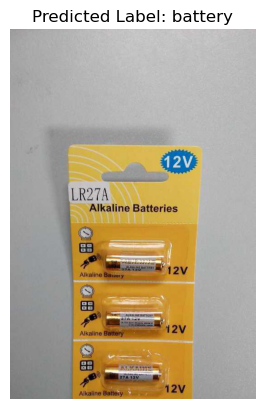

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


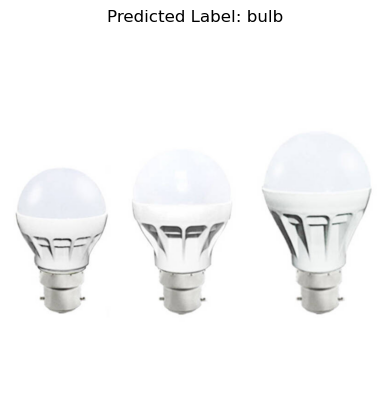

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


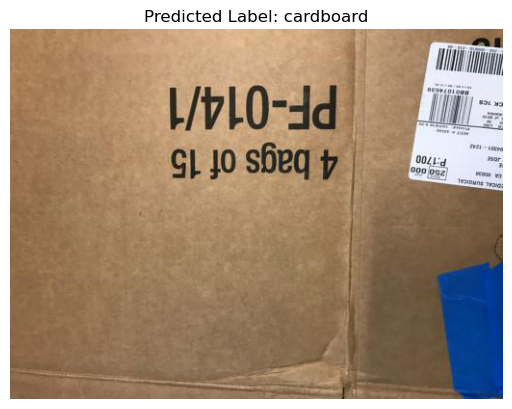

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


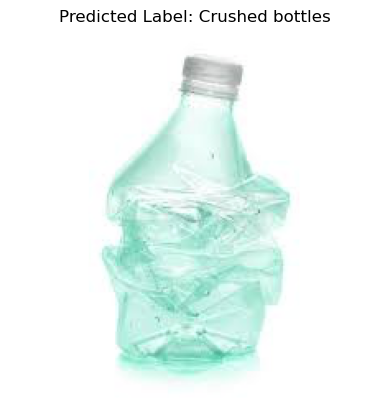

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


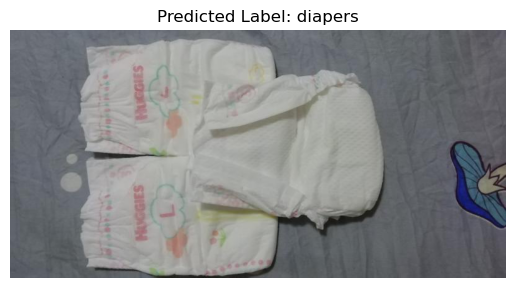

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


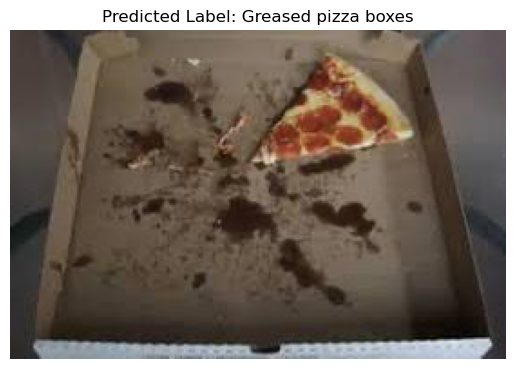

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


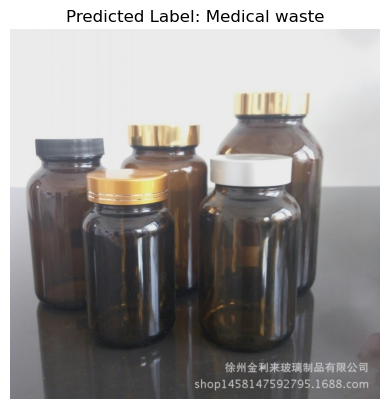

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


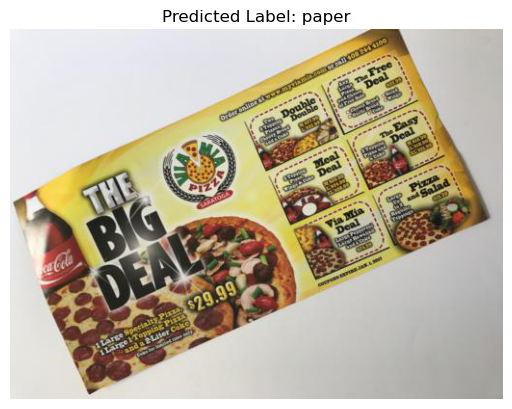

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


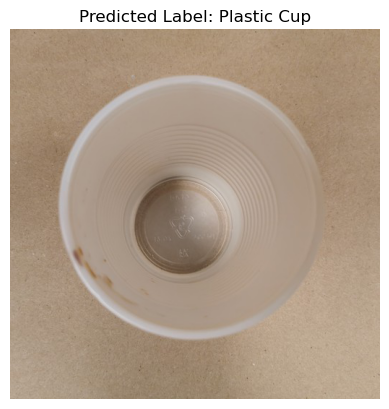

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


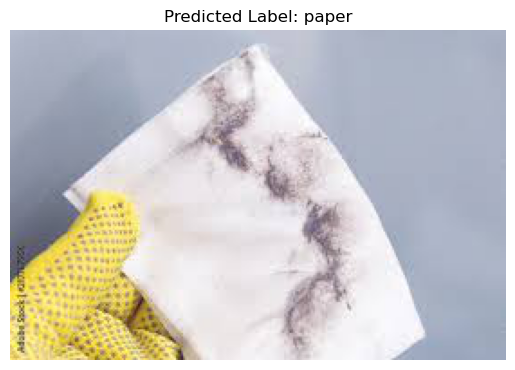

In [61]:
model_path = "inception_v3_model.h5"
model = load_model(model_path)

# Define the labels (must match the labels used during training)
labels = list(val_generator.class_indices.keys())  # Assuming val_generator is defined as in the previous code

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch (1, height, width, channels)
    img_array /= 255.0  # Normalize the image
    return img_array

# Predict the label of an image
def predict_image_label(img_path):
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)  # Get model predictions
    predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    predicted_label = labels[predicted_class[0]]  # Map index to class label

    # Display the image along with the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Test the function
img_path = "cigarettebutt_cigarettebutt (38).jpg"  
img_path1 = "battery_battery (136).jpg"  
img_path2 = "bulb_bulb (124).jpg"  
img_path3 = "cardboard_carboard (250).jpg"  
img_path4 = "Crushed bottles_crushed_bottle (24).jpeg"  
img_path5 = "diapers_diaper (20).jpg"  
img_path6 = "Greased pizza boxes_greased_pizza_box (3).jpg"  
img_path7 = "Medical waste_medical_waste (205).jpg"  
img_path8 = "paper_paper (269).jpg"  
img_path9 = "Plastic Cup_plastic_cups (63).jpg"
img_path10 = "Used napkins_used_napkins (7).jpeg"  
predict_image_label(img_path)
predict_image_label(img_path1)
predict_image_label(img_path2)
predict_image_label(img_path3)
predict_image_label(img_path4)
predict_image_label(img_path5)
predict_image_label(img_path6)
predict_image_label(img_path7)
predict_image_label(img_path8)
predict_image_label(img_path9)
predict_image_label(img_path10)